# HEOM solver - Two level system
## An exact solution to a system-bath evolution using the hierarchical equations of motion and the Drude-Lorentz model for spectral density

Authors: Alexander Pitchford (alex.pitchford@gmail.com)
         Neill Lambert (nwlambert@gmail.com)

## Introduction
### Hierarchical equations of motion

The HEOM (hierarchical equations of motion) method can compute open system dynamics without using any Markovian or rotating wave approximation (RWA) for systems where the bath correlations can be approximated to a sum of complex eponentials. The bath is described in an abstract way, via a formal expansion of the full system-bath equation of motion, which results in a set of coupled "density matrices" for the system. A overview of the method is given in [1].

The HEOM solver will compute the dynamics of a quantum system coupled to a bath with a complete Hamiltonian given by

\begin{equation*}
H = H_s + Q\sum_{j}g_j(a_j^{\dagger}+a_j) + \sum_{j}\omega_j a_j^{\dagger}a_j
\end{equation*}

The dynamics of the quantum system of interest, if independent of the environment, would be described the system Hamiltonian $H_s$. The $a_j^{\dagger}$ and $a_j$ are the creation and annihilation operators of the bosonic modes of frequency $\omega_j$ of the bath that models the environment. The system operator Q couples with the bath with a strength $g_j$ for each mode.

### Drude-Lorentz spectral density
The spectral density determines the strength of the interact for specific modes. The Drude-Lorentz (DL) model for the spectral density is given by

$$J(\omega)=\omega \frac{2\lambda\gamma}{{\gamma}^2 + \omega^2}$$

where $\lambda$ is an overall scale factor for the coupling strength, and $\gamma$ is a cut-off frequency

The correlation function can be calculated via Fourier transform and gives an infinite exponential series of the form

\begin{equation*}
L(t)=\sum_{k=0}^{k=\infty} c_k e^{-\nu_k t}
\end{equation*}

as this is in the form of a sum of exponentials it allows us to use the HEOM. Some cut-off for $k$ will be required  in order for it to be computable; in practice this is typically quite small ($<5$). The series term frequencies and coefficients (known as Matsubara terms, frequencies and coefficients in the DL model) as given by

\begin{equation*}
    \nu_k = \begin{cases}
               \gamma               & k = 0\\
               {2 \pi k} / {\beta \hbar}  & k \geq 1\\
           \end{cases}
\end{equation*}

\begin{equation*}
    c_k = \begin{cases}
               \lambda \gamma (\cot(\beta \gamma / 2) - i) / \hbar               & k = 0\\
               4 \lambda \gamma \nu_k / \{(nu_k^2 - \gamma^2)\beta \hbar^2 \}    & k \geq 1\\
           \end{cases}
\end{equation*}

### Two-level system example
The example system in this notebook is taken from [2], which also gives an overview of the HEOM method in its appendix D. Here we look to compute the dynamics of a system where

\begin{equation*}
H_s = \frac{\epsilon}{2}\sigma_z + \frac{\Delta}{2}\sigma_x
\end{equation*}

and the coupling operator $Q=\sigma_z$. The energy of the two level system is given by $\epsilon$, the strength of the tunnelling effect by $\Delta$. This model is a much interest in the study of the potential quantum effects at work in photosynthesis, as discussed in some of the papers cited in [2]

### References
    1. link.aps.org/doi/10.1103/PhysRevLett.104.250401 
    2. link.aps.org/doi/10.1103/PhysRevA.90.032114

In [1]:
%pylab inline
from qutip import *

Populating the interactive namespace from numpy and matplotlib


In [125]:

#HEOM Convergence parameters
#Nc is the cut-off, and depends on Nc>> 
Nc = 30
#K is the matsubara terms; if temperature < system energy, one needs K>1
K=2
 
initial_state= coherent_dm(Nboson,(1.+1.j)/sqrt(2.))
#HEOM Coupling strength
lam0=pi*alpha/2.  #system batch coupling strength.  Note that for the HEOM this differs from the RC definition by pi/2. 



In [126]:
resultHEOM= hsolveL(Hboson, Q, wc, lam0, Nc, K, Temperature, tlist, initial_state, options=Options(nsteps=15000))

In [72]:
nboscheckN30K1=expect(resultHEOM.states,a.dag()*a)

In [73]:
pN30k1=-1.j*expect(resultHEOM.states,(1/sqrt(2.))*(-a.dag()+a))

In [74]:
xN30k1=expect(resultHEOM.states,(1/sqrt(2.))*(a.dag()+a))

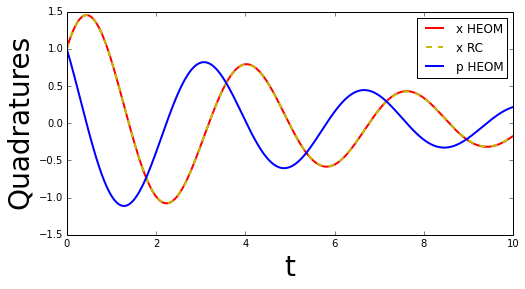

In [75]:
fig, axes = subplots(1, 1, sharex=True, figsize=(8,4))
#axes.plot(tlist, real(nbos), 'b', linewidth=2, label="P1 HEOM")
axes.plot(tlist, real(xN30k1), 'r', linewidth=2, label="x HEOM")
axes.plot(tlist, real(resultRC.expect[1]), 'y--', linewidth=2, label="x RC")
axes.plot(tlist, real(pN30k1), 'b', linewidth=2, label="p HEOM")

axes.set_xlabel(r't', fontsize=28)
axes.set_ylabel(r'Quadratures', fontsize=28)
axes.legend(loc=0, fontsize=12)

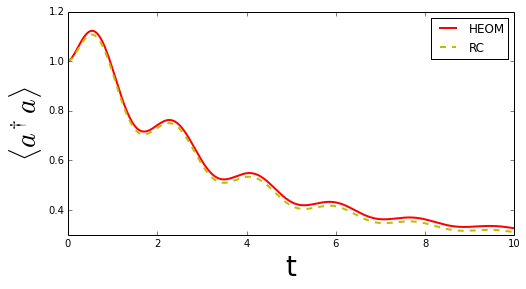

In [78]:
#Not quite converged:  increase matsubara terms?
fig, axes = subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(tlist, real(nboscheckN30K1), 'r', linewidth=2, label="HEOM")
axes.plot(tlist, real(resultRC.expect[0]), 'y--', linewidth=2, label="RC")

axes.set_xlabel(r't', fontsize=28)
axes.set_ylabel(r'$\langle a^{\dagger}a\rangle$', fontsize=28)
axes.legend(loc=0, fontsize=12)

### Two level system example, comparing RC and HEOM results for weak and strong coupling.  Corresponds to figure 1 in  link.aps.org/doi/10.1103/PhysRevA.90.032114 

In [5]:


Del = 1.0    # Tunnelling term
wq = 0.5     # Energy of the 2-level system.
Hsys = 0.5 * wq * sigmaz() + 0.5 * Del * sigmax()

#Coupling operator to the bath:

Q = sigmaz()

In [20]:
wc = 0.05                # Cutoff frequency.
alpha = 0.1/pi           # Coupling strength.
N =3                   # Number of RC fock states cutoff
Temperature = 1/0.95     # Tempertaure.
tlist = np.linspace(0, 40, 600)
initial_state = basis(2,0) * basis(2,0).dag()                # Initial state of the system.
P1p=basis(2,0) * basis(2,0).dag()
P12p=basis(2,0) * basis(2,1).dag()

return_vals = [initial_state, basis(2,0) * basis(2,1).dag()   ]            # List for which to calculate expectation value
eigen_sparse = False
calc_time = True                                             
options = Options(nsteps=15000, store_states=True)        # Options for the solver.


In [21]:

resultRC = rcsolveL(Hsys, Q, wc, alpha, N, Temperature, tlist, initial_state,
                 return_vals, eigen_sparse, options)

### Solving the HEOM  for $\alpha=0.1 \Delta /\pi$

In [27]:



#Convergence parameters
#Nc is the cut-off, 
Nc = 10
#K is the matsubara terms; if temperature < system energy,  N>1
K=1 
 
lam0=np.pi*alpha/2.  #system batch coupling strength.  Note that for the HEOM this differs from the RC definition by pi/2. 



In [28]:
resultHEOM = hsolveL(Hsys, Q, wc, lam0, Nc, K, Temperature, tlist, initial_state, options=Options(nsteps=15000))

### Plotting the TLS state occupation for $\alpha=0.1 \Delta /\pi$

In [141]:
resultHEOM

Result object with hsolve data.
-------------------------------
states = True
num_collapse = 0

In [29]:
P1RC=real(resultRC.expect[0])
P12RC=real(resultRC.expect[1])

P1HEOM=expect(resultHEOM.states,P1p)
P12HEOM=expect(resultHEOM.states,P12p)

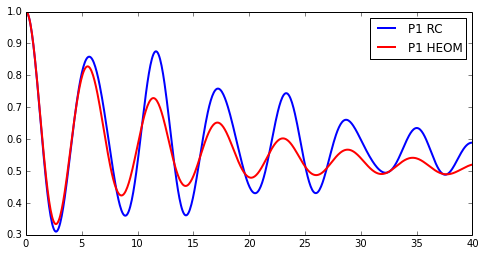

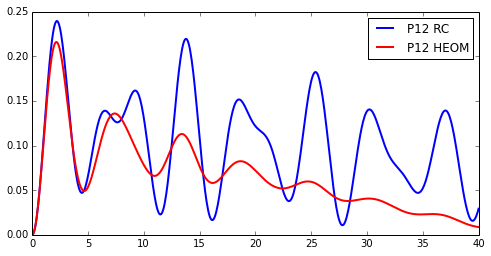

In [30]:
fig, axes = subplots(1, 1, sharex=True, figsize=(8,4))
axes.plot(tlist, P1RC, 'b', linewidth=2, label="P1 RC ")
axes.plot(tlist, real(P1HEOM), 'r', linewidth=2, label="P1 HEOM")

axes.legend(loc=0)
fig, axes2 = subplots(1, 1, sharex=True, figsize=(8,4))
axes2.plot(tlist, P12RC, 'b', linewidth=2, label="P12 RC")
axes2.plot(tlist, real(P12HEOM), 'r', linewidth=2, label="P12 HEOM")

axes2.legend(loc=0)

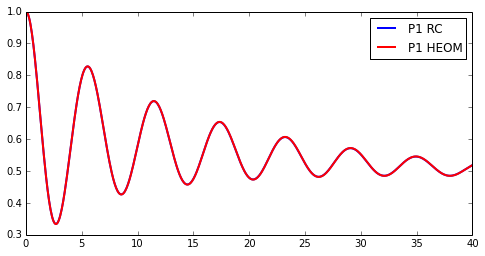

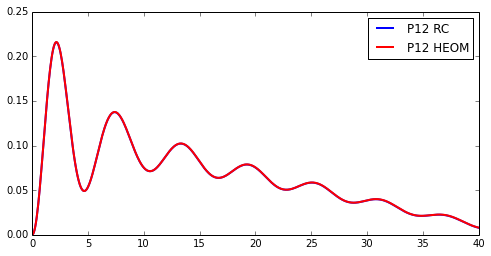

In [115]:
fig, axes = subplots(1, 1, sharex=True, figsize=(8,4))
axes.plot(tlist, P1RC, 'b', linewidth=2, label="P1 RC ")
axes.plot(tlist, real(P1HEOM), 'r', linewidth=2, label="P1 HEOM")

axes.legend(loc=0)
fig, axes2 = subplots(1, 1, sharex=True, figsize=(8,4))
axes2.plot(tlist, P12RC, 'b', linewidth=2, label="P12 RC")
axes2.plot(tlist, real(P12HEOM), 'r', linewidth=2, label="P12 HEOM")

axes2.legend(loc=0)

### Solving the RC master equation for $\alpha=2.5\Delta /\pi$

In [116]:
wc = 0.05                # Cutoff frequency.
alpha = 2.5/pi           # Coupling strength.
N = 20                   # Number of cavity fock states.
Temperature = 1/0.95     # Tempertaure.
tlist = np.linspace(0, 40, 600)
initial_state = basis(2,0) * basis(2,0).dag()                # Initial state of the system.
#return_vals = [tensor(qeye(N), kk) for kk in [Q]]            # List for which to calculate expectation value
return_vals = [initial_state, basis(2,0) * basis(2,1).dag()   ]            # List for which to calculate expectation value
eigen_sparse = False
calc_time = True                                             
options = Options(nsteps=15000, store_states=True)        # Options for the solver.

resultRC = rcsolveL(Hsys, Q, wc, alpha, N, Temperature, tlist, initial_state,
                 return_vals, eigen_sparse, options)

### Solving the HEOM  for $\alpha=2.5\Delta /\pi$

In [117]:



#Convergence parameters
#Nc is the cut-off, and depends on Nc>> 
Nc = 60
#K is the matsubara terms; if temperature < system energy,  N>1
K=2 
 
lam0=np.pi*alpha/2.  #system batch coupling strength.  Note that for the HEOM this differs from the RC definition by pi/2. 
#because of differences in the definitions of the spectral density and correlation functions in the derivation


In [118]:
resultHEOM = hsolveL(Hsys, Q, wc, lam0, Nc, K, Temperature, tlist, initial_state, options=Options(nsteps=15000))

In [119]:
P1RC=real(resultRC.expect[0])
P12RC=real(resultRC.expect[1])

P1HEOM=expect(resultHEOM.states,P1p)
P12HEOM=expect(resultHEOM.states,P12p)

### Plotting the TLS state occupation  for $\alpha=2.5\Delta /\pi$

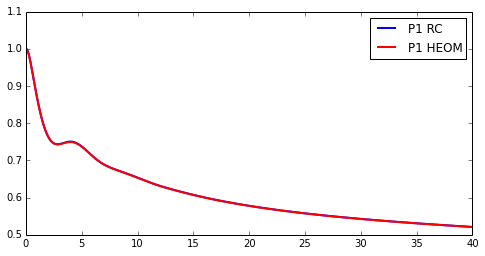

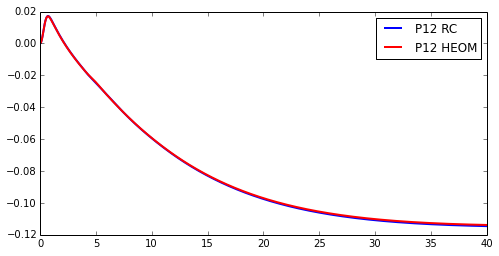

In [120]:


fig, axes = subplots(1, 1, sharex=True, figsize=(8,4))
axes.plot(tlist, P1RC, 'b', linewidth=2, label="P1 RC ")
axes.plot(tlist, real(P1HEOM), 'r', linewidth=2, label="P1 HEOM")

axes.legend(loc=0)
fig, axes2 = subplots(1, 1, sharex=True, figsize=(8,4))
axes2.plot(tlist, P12RC, 'b', linewidth=2, label="P12 RC")
axes2.plot(tlist, real(P12HEOM), 'r', linewidth=2, label="P12 HEOM")

axes2.legend(loc=0)

### Plotting the wigner function of the RC mode

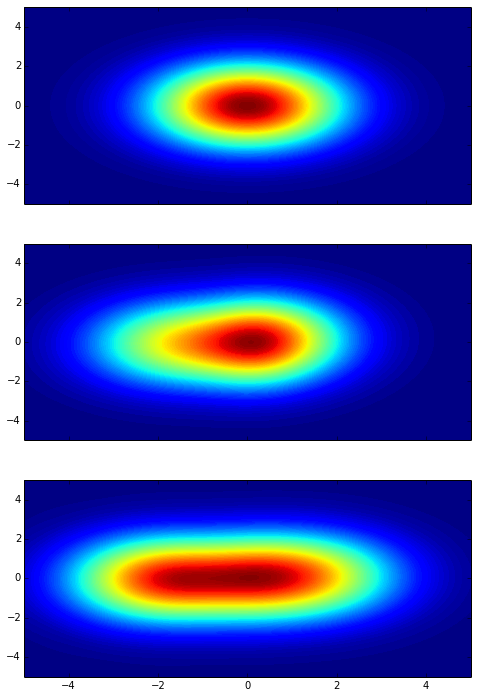

In [99]:
#for $\alpha=2.5\Delta /\pi$

xvec = linspace(-5,5,200)
t_idx_vec = range(0,len(tlist),200) 

fig, axes = subplots(len(t_idx_vec), 1, sharex=True, sharey=True, figsize=(8,4*len(t_idx_vec)))

for idx, t_idx in enumerate(t_idx_vec):
    psi_a = ptrace(resultRC.states[t_idx], 0)
    
    W_a = wigner(psi_a, xvec, xvec)
    
    
    cont1 = axes[idx].contourf(xvec, xvec, W_a, 100)
   

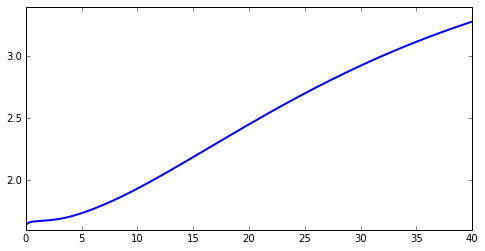

In [102]:
#RC mode occupation:

a  = tensor(destroy(20), qeye(2))          
nRC= expect(resultRC.states,a.dag()*a)
fig, axes = subplots(1, 1, sharex=True, figsize=(8,4))
axes.plot(tlist, nRC, 'b', linewidth=2, label="n RC ")


### Software versions

In [93]:
from qutip.ipynbtools import version_table

version_table()